### PROJECT:3 PYTHON(NUMPY,PANDAS,MATPLOTLIB)

##### 1. Employee Attrition & HR Analytics


Attrition by Department:
 Department
Finance    0.777778
HR         0.800000
IT         0.500000
Sales      0.500000
Name: Attrition, dtype: float64

Attrition by Gender:
 Gender
0    0.533333
1    0.733333
Name: Attrition, dtype: float64

Attrition by Age Group:
 AgeGroup
18-25    1.000000
26-35    0.800000
36-45    0.500000
46-55    0.666667
56-65    0.250000
Name: Attrition, dtype: float64

Correlation Matrix (Salary, Age, Attrition):
             Salary       Age  Attrition
Salary     1.000000 -0.030271   0.323570
Age       -0.030271  1.000000  -0.375324
Attrition  0.323570 -0.375324   1.000000


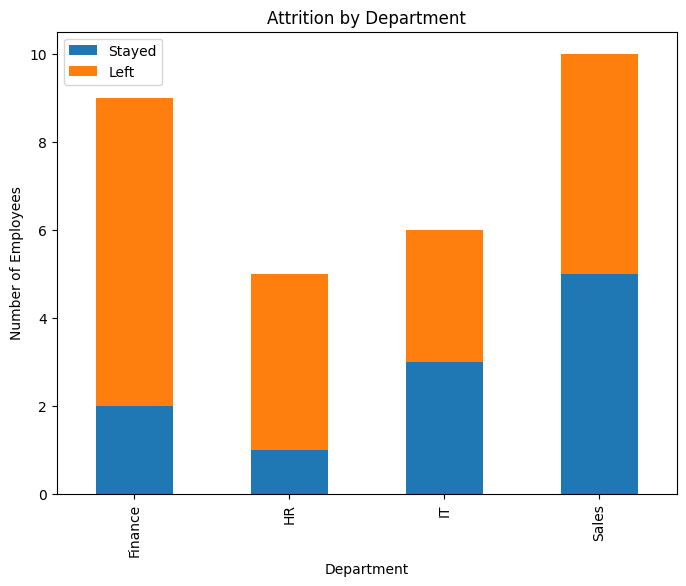

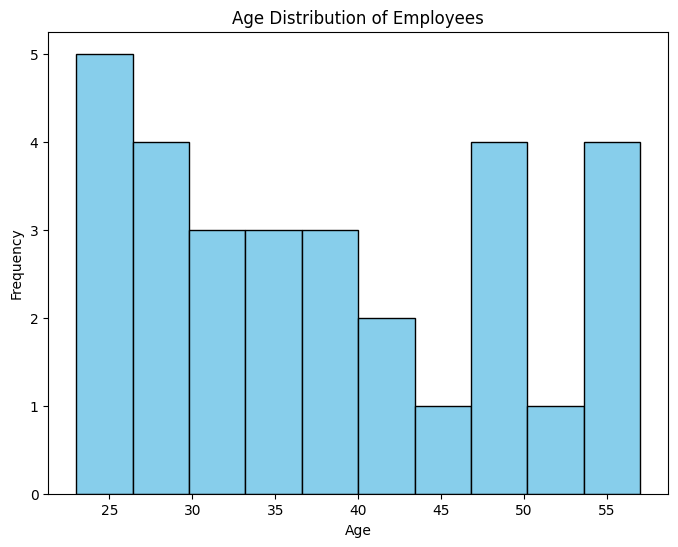

<Figure size 800x600 with 0 Axes>

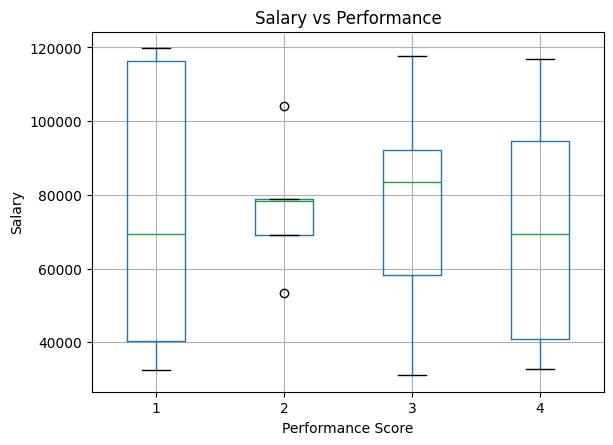

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Create Dummy Dataset
# -----------------------------
np.random.seed(42)  # reproducibility

data = {
    "EmployeeID": range(1, 31),
    "FirstName": [f"Emp{i}" for i in range(1, 31)],
    "Department": np.random.choice(["HR", "IT", "Finance", "Sales"], 30),
    "Gender": np.random.choice(["Male", "Female"], 30),
    "Age": np.random.randint(22, 60, 30),
    "Salary": np.random.randint(30000, 120000, 30),
    "PerformanceScore": np.random.randint(1, 5, 30),
    "Attrition": np.random.choice(["Yes", "No"], 30)
}

df = pd.DataFrame(data)

# -----------------------------
# 2. Clean & Preprocess Data
# -----------------------------
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})

df["Attrition"] = df["Attrition"].map({"Yes": 1, "No": 0})

# -----------------------------
# 3. Attrition Rates
# -----------------------------
# By Department
dept_attrition = df.groupby("Department")["Attrition"].mean()

# By Gender
gender_attrition = df.groupby("Gender")["Attrition"].mean()

# By Age Group
bins = [18, 25, 35, 45, 55, 65]
labels = ["18-25", "26-35", "36-45", "46-55", "56-65"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)

age_attrition = df.groupby("AgeGroup", observed=False)["Attrition"].mean()

print("\nAttrition by Department:\n", dept_attrition)
print("\nAttrition by Gender:\n", gender_attrition)
print("\nAttrition by Age Group:\n", age_attrition)

# -----------------------------
# 4. NumPy Correlation
# -----------------------------
numeric_cols = ["Salary", "Age", "Attrition"]
corr_matrix = np.corrcoef(df[numeric_cols].values.T)

print("\nCorrelation Matrix (Salary, Age, Attrition):")
print(pd.DataFrame(corr_matrix, index=numeric_cols, columns=numeric_cols))

# -----------------------------
# 5. Visualizations
# -----------------------------

# (a) Stacked Bar Chart - Attrition by Department
attrition_dept = df.groupby(["Department", "Attrition"]).size().unstack(fill_value=0)
attrition_dept.plot(kind="bar", stacked=True, figsize=(8,6))
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(["Stayed", "Left"])
plt.show()

# (b) Histogram - Age Distribution
plt.figure(figsize=(8,6))
plt.hist(df["Age"], bins=10, color="skyblue", edgecolor="black")
plt.title("Age Distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# (c) Boxplot - Salary vs Performance
plt.figure(figsize=(8,6))
df.boxplot(column="Salary", by="PerformanceScore")
plt.title("Salary vs Performance")
plt.suptitle("")  # remove default title
plt.xlabel("Performance Score")
plt.ylabel("Salary")
plt.show()


#### PROJECT:4 PYTHON (NUMPY, PANDAS, SEABORN): 

##### 1. Employee Salary & Performance Insights


Sample Data:
   EmployeeID Department  Salary  YearsExperience  PerformanceRating  \
0           1      Sales   53483               17                  2   
1           2  Marketing   78555                8                  5   
2           3    Finance   47159                3                  1   
3           4  Marketing  110077                3                  5   
4           5  Marketing   65920                1                  4   

   Promoted  DeptCode  
0         0         4  
1         0         3  
2         0         0  
3         0         3  
4         0         3  

Salary Percentiles (25, 50, 75): [ 53687.25  78769.5  100778.  ]
Salary Variance: 758342705.21

Department-wise Stats:
  Department     AvgSalary  PromotionRate
0    Finance  90552.700000       0.400000
1         HR  76182.571429       0.285714
2         IT  63381.600000       0.300000
3  Marketing  81038.900000       0.300000
4      Sales  79555.000000       0.461538


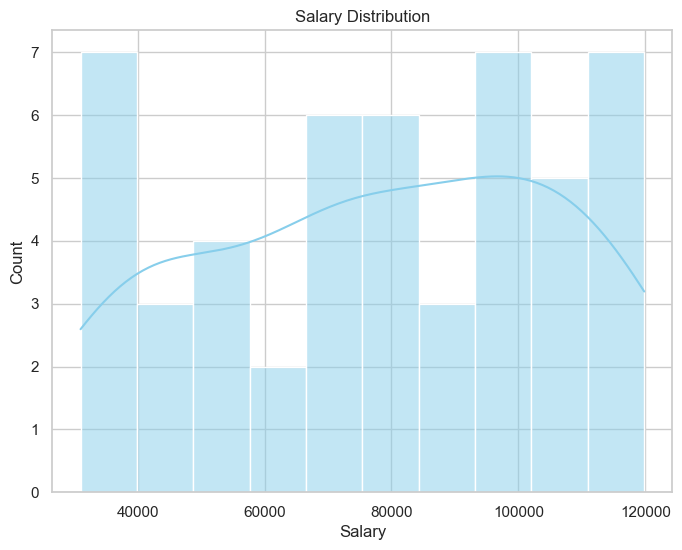

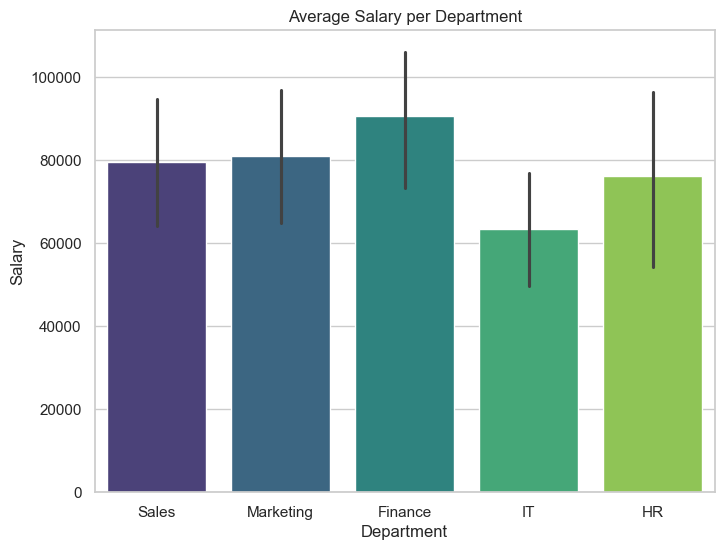

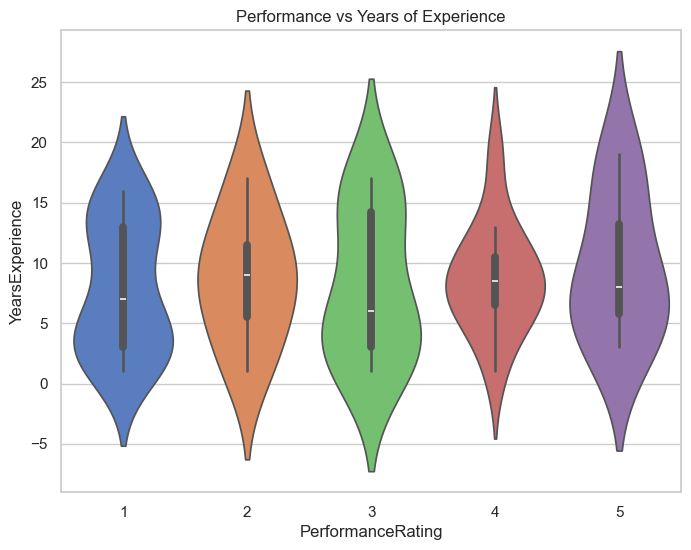

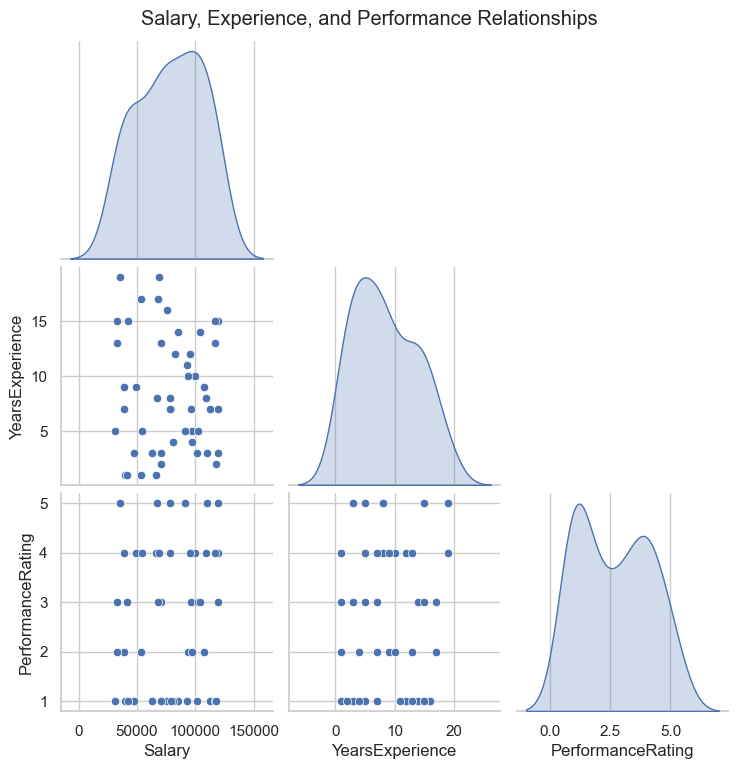

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Create Dummy HR Dataset
# -----------------------------
np.random.seed(42)

n = 50
data = {
    "EmployeeID": range(1, n+1),
    "Department": np.random.choice(["HR", "IT", "Finance", "Sales", "Marketing"], n),
    "Salary": np.random.randint(30000, 120000, n),
    "YearsExperience": np.random.randint(1, 20, n),
    "PerformanceRating": np.random.randint(1, 6, n),  # 1 to 5
    "Promoted": np.random.choice([0, 1], n, p=[0.7, 0.3])  # 0 = No, 1 = Yes
}

df = pd.DataFrame(data)

# -----------------------------
# 2. Clean & Preprocess
# -----------------------------
# Encode Department if needed (example only)
df["DeptCode"] = df["Department"].astype("category").cat.codes

print("\nSample Data:")
print(df.head())

# -----------------------------
# 3. NumPy Salary Stats
# -----------------------------
salaries = df["Salary"].values
percentiles = np.percentile(salaries, [25, 50, 75])
variance = np.var(salaries)

print("\nSalary Percentiles (25, 50, 75):", percentiles)
print("Salary Variance:", variance)

# -----------------------------
# 4. Pandas GroupBy Analysis
# -----------------------------
dept_stats = df.groupby("Department").agg(
    AvgSalary=("Salary", "mean"),
    PromotionRate=("Promoted", "mean")
).reset_index()

print("\nDepartment-wise Stats:")
print(dept_stats)

# -----------------------------
# 5. Seaborn Visualizations
# -----------------------------
sns.set(style="whitegrid")

# (a) Salary Distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Salary"], bins=10, kde=True, color="skyblue")
plt.title("Salary Distribution")
plt.show()

# (b) Avg Salary per Department
plt.figure(figsize=(8,6))
sns.barplot(x="Department", y="Salary", hue="Department", data=df, estimator=np.mean, palette="viridis", legend=False)
plt.title("Average Salary per Department")
plt.show()

# (c) Violinplot - Performance vs Years of Experience
plt.figure(figsize=(8,6))
sns.violinplot(x="PerformanceRating", y="YearsExperience", hue="PerformanceRating", data=df, palette="muted", legend=False)
plt.title("Performance vs Years of Experience")
plt.show()

# (d) Pairplot - Salary, Experience, Performance
sns.pairplot(df[["Salary", "YearsExperience", "PerformanceRating"]], diag_kind="kde", corner=True)
plt.suptitle("Salary, Experience, and Performance Relationships", y=1.02)
plt.show()